#### [ 지도학습 - 회귀 ]
- 회귀(Regression) : 수치값을 예측하는 학습
    * 예 : 거리, 시간, 무게, 집가격 등등 ...

- 주제 : 공부시간과 과외횟수에 따른 점수 예측
- 방법 : Linear Model 계열의 LinearRegression

[1] 모듈 로딩 및 데이터 준비 <hr>

In [21]:
## ==========================================
## [1-1] 모듈 로딩
## ==========================================
import pandas as pd
import numpy as np

## 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML 관련
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## ML 모델 성능지표 관련 모류
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import root_mean_squared_error, r2_score

## Cow 활성화 : 복사와 공유 자동 설정 기능 활성화
pd.options.mode.copy_on_write = True

# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)



In [33]:
## =======================================
## [1-2] 데이터 준비 및 확인
## =======================================
## 데이터 준비
hour  = [1,  2,  3,  5,  7,  8,  10]
count = [0,  0,  1,  1,  2,  2,  2 ]
score = [15, 32, 45, 55, 60, 73, 91]

## 공부시간과 과외횟수, 성적 데이터 셋
dataDF = pd.DataFrame({'Hour' : hour, 'Count' : count, 'Score' : score})
dataDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hour    7 non-null      int64
 1   Count   7 non-null      int64
 2   Score   7 non-null      int64
dtypes: int64(3)
memory usage: 300.0 bytes


0.9761726878604323


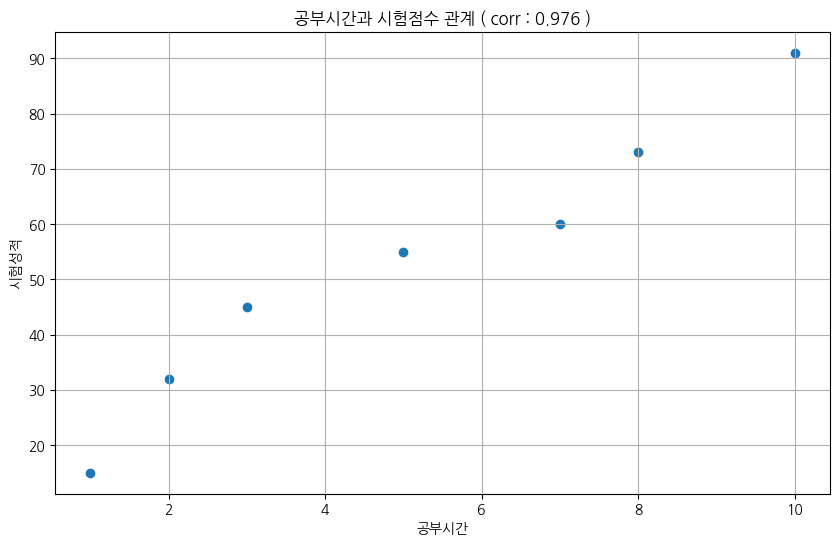

In [34]:
## ========================================================
## 공부시간과 과외횟수 성적 관계 시각화 => Linear Model로써
##                                  피쳐와 타겟 선형 관계성
## ========================================================
## => 상관계수 계산 : [기] person => 피쳐와 타겟의 직선의 선형성
corr_ = dataDF.corr(numeric_only=True)
corr_value = corr_['Hour'].Score
print(corr_value)

## => 시각화
plt.figure(figsize=(10,6))
plt.scatter(dataDF.Hour, dataDF.Score)
plt.title(f"공부시간과 시험점수 관계 ( corr : {corr_value:.3f} )")
plt.xlabel('공부시간')
plt.ylabel('시험성적')
plt.grid()
plt.show()

[2] 피쳐와 타겟/학습용과 테스트 분리 <hr>

In [35]:
## [2-1] 피쳐(2D)와 티겟(1D) 분리
featureDF = dataDF[dataDF.columns[0:-1]] ## 공부시간
# print(featureDF.shape)
targetSR = dataDF[dataDF.columns[-1]]     ## 성적
# print(targetSR.shape)

x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.2,
                                                    random_state=10,
                                                    # stratify=targetSR ## 분류에만 사용, 회귀는 X
                                                    )

print(f'[TRAIN] x_train:{x_train.shape},  y_train:{y_train.shape}')
print(f'[TEST] x_test:{x_test.shape},  y_test:{y_test.shape}')

[TRAIN] x_train:(5, 2),  y_train:(5,)
[TEST] x_test:(2, 2),  y_test:(2,)


[3] 학습 진행 <hr>

In [36]:
## 모델 인스턴스 생성
lrModel = LinearRegression()
lrModel

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
## 학습진행 => 학습용 데이터셋만 사용 ===> 시험성적 = 공부시간*w2 + 과외횟수*w1 + w0
lrModel.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
## 학습 후 학습용데이터셋 기반 모델 파라미터 설정
## - 모델 파라미터 : 파라미터이름_ => 피쳐에 곱해지는 가중치 w, 결과 미세조정 bias
print('가중치 coef_          :', lrModel.coef_)
print('절  편 intercept_     :', lrModel.intercept_)
print('n_feature_names_in   :', lrModel.feature_names_in_)
print('n_features_in_       :', lrModel.n_features_in_)

print('선형식 즉, 모델 : ', f'공부시간 X ({lrModel.coef_[1]:.2f}) + 과외횟수 X ({lrModel.coef_[0]:.2f}) + ({lrModel.intercept_:.2f})')


가중치 coef_          : [ 15.833333 -26.      ]
절  편 intercept_     : 0.1666666666666714
n_feature_names_in   : ['Hour' 'Count']
n_features_in_       : 2
선형식 즉, 모델 :  공부시간 X (-26.00) + 과외횟수 X (15.83) + (0.17)


[4] 성능평가 <hr>

In [ ]:
## 훈련용 성능평가 & 테스트용 성능평가 비교
## 회귀모델의 score의 기본은 r2_score ==> 0~1: 1에 가까울 수록 좋은 성능!
##                                     관계성이 없다면 마이너스가 나올 수 있음 : 쓰레기 모델(버리뿌자!)
train_score = lrModel.score(x_train, y_train)
test_score  = lrModel.score(x_test, y_test)

print(f'train_score : {train_score}')
print(f'test_score  : {test_score}')

train_score : 0.9962156317578004
test_score  : 0.2583228313379542


In [ ]:
## ========================================================
## 다양한 회귀 모델 성능지표 확인
## =======================================================
## => 예측값과 실제값 비교
pre_score = lrModel.predict(x_test)

## => 성능지표 
print('MAE  :', mean_absolute_error(y_test, pre_score))
print('MSE  :', mean_squared_error(y_test, pre_score))
print('RMSE :', root_mean_squared_error(y_test, pre_score))
print('R2   :', r2_score(y_test, pre_score))


## => 회귀선이 얼마나 데이터를 잘 설명/표현하는가? : 값이 1에 가까울 수록 좋음
print('R2 :', r2_score(y_test,pre_score))

MAE  : 19.41666666666667
MSE  : 392.34722222222223
RMSE : 19.807756617603676
R2   : 0.2583228313379542
